In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('weather_data.csv')
df.head(5)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Max Temp (°C),Max Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,01/01/2024,2024,1,1,-0.7,NaN,...,NaN,NaN,0.1,NaN,2.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,02/01/2024,2024,1,2,1.5,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,03/01/2024,2024,1,3,3.1,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,04/01/2024,2024,1,4,1.8,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,05/01/2024,2024,1,5,0.4,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,M,NaN,M


In [4]:
df.isnull().sum()

Longitude (x)                  0
Latitude (y)                   0
Station Name                   0
Climate ID                     0
Date/Time                      0
Year                           0
Month                          0
Day                            0
Max Temp (°C)                  3
Max Temp Flag                363
Min Temp (°C)                  3
Min Temp Flag                363
Mean Temp (°C)                 3
Mean Temp Flag               363
Heat Deg Days (°C)             3
Heat Deg Days Flag           363
Cool Deg Days (°C)             3
Cool Deg Days Flag           363
Total Rain (mm)              366
Total Rain Flag              366
Total Snow (cm)              366
Total Snow Flag              366
Total Precip (mm)              3
Total Precip Flag            363
Snow on Grnd (cm)            317
Snow on Grnd Flag            366
Dir of Max Gust (10s deg)    366
Dir of Max Gust Flag           0
Spd of Max Gust (km/h)       366
Spd of Max Gust Flag           0
dtype: int

In [6]:
df = df.replace({"M": np.nan, "": np.nan})
df = df.dropna(subset= ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)'])


/var/folders/xb/28l3z9l96n512j02c31ptrc40000gn/T/ipykernel_70075/1102190852.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"M": np.nan, "": np.nan})


In [10]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst = 'true')
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)

In [12]:
monthy_max = df.groupby('Month')['Max Temp (°C)'].max()
print(monthy_max)

Month
1      7.0
2     15.4
3     21.1
4     19.9
5     29.8
6     33.1
7     32.3
8     32.4
9     28.8
10    23.9
11    22.6
12    11.8
Name: Max Temp (°C), dtype: float64


In [13]:
monthy_min = df.groupby('Month')['Min Temp (°C)'].min()
print(monthy_min)

Month
1    -14.2
2    -11.9
3     -6.6
4      1.2
5      8.4
6     11.3
7     11.8
8     11.4
9      8.4
10     1.8
11    -2.9
12   -16.3
Name: Min Temp (°C), dtype: float64


In [23]:
monthy_avg = df.groupby('Month')['Mean Temp (°C)'].mean()
print(monthy_avg)
df['Monthly_Avg'] = df['Month'].map(monthy_avg)

Month
1     -1.190323
2      1.524138
3      4.541935
4      9.196667
5     16.896774
6     20.350000
7     22.865517
8     21.690323
9     19.489655
10    12.670968
11     7.433333
12     0.541935
Name: Mean Temp (°C), dtype: float64


In [30]:
days_hotter_avg = df[df['Mean Temp (°C)'] > df['Monthly_Avg']]
hotter_days_count = days_hotter_avg.groupby('Month').size().sort_index()
print("Month | Days hotter than monthly average")
for month, count in hotter_days_count.items():
    print(f"{month:2}    | {count}")

Month | Days hotter than monthly average
 1    | 19
 2    | 14
 3    | 17
 4    | 16
 5    | 15
 6    | 15
 7    | 17
 8    | 17
 9    | 18
10    | 15
11    | 14
12    | 15


In [35]:
df = df.sort_values('Date/Time')
df['7day_rolling_avg'] = df['Mean Temp (°C)'].rolling(window = 7).mean()
df['7day_rolling_avg']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
361   -3.357143
362   -1.000000
363    1.814286
364    3.057143
365    3.414286
Name: 7day_rolling_avg, Length: 363, dtype: float64

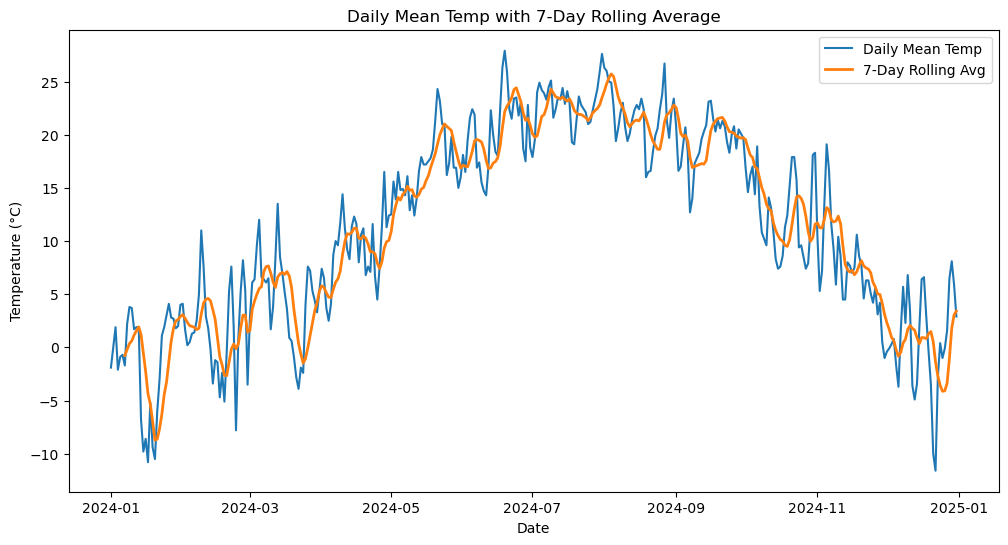

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df['Date/Time'], df['Mean Temp (°C)'], label='Daily Mean Temp')
plt.plot(df['Date/Time'], df['7day_rolling_avg'], label='7-Day Rolling Avg', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Mean Temp with 7-Day Rolling Average')
plt.legend()
plt.show()